### Домашнее задание по визуализации

В домашнем задании будем работать с данными фильмов на IMDB. 

Для начала считаем данные и проигнорируем все строки, которые не распарсились (для простоты).

In [2]:
import pandas as pd
df = pd.read_csv('imdb.csv', on_bad_lines='skip')

__Задача 1:__ С каким параметром больше всего коррелирует число побед? 
Ответ на задачу - название колонки в dataframe, с которой больше всего коррелирует `nrOfWins`.

In [10]:
numeric_df = df.select_dtypes(include=['number'])
corr_matrix = numeric_df.corr()
#print(corr_matrix)
corr_of_ourLine = corr_matrix['nrOfWins']
print(corr_of_ourLine)
no_thisLine = corr_of_ourLine.drop('nrOfWins').idxmax() # убираем сам параметр из таблицы 
print(no_thisLine)

imdbRating          0.197062
ratingCount         0.414537
duration            0.127717
year                0.075403
nrOfWins            1.000000
nrOfNominations     0.809314
nrOfPhotos          0.277551
nrOfNewsArticles    0.362361
nrOfUserReviews     0.382080
nrOfGenre           0.053600
Action             -0.035707
Adult              -0.012747
Adventure          -0.000846
Animation          -0.026673
Biography           0.094786
Comedy             -0.059248
Crime               0.016029
Documentary        -0.057697
Drama               0.193084
Family             -0.017698
Fantasy             0.016373
FilmNoir           -0.030804
GameShow           -0.018616
History             0.052774
Horror             -0.047425
Music               0.008596
Musical            -0.002966
Mystery             0.025273
News               -0.018600
RealityTV          -0.015195
Romance             0.051949
SciFi              -0.028716
Short              -0.056848
Sport              -0.004723
TalkShow      

__Задача 2:__ Посмотрите, как изменялась средняя оценка фильмов (рейтинг IMDB) с течением времени? В какое десятилетие была самая высокая средняя оценка. 

Ответ - tuple, где на первом месте тип тренда (слово 'ascending' или 'descending'), на втором - десятилие, например, если самые "хорошие" фильмы были в период 1950 - 1959, то 1950.

In [19]:
df['decade'] = (df['year'] // 10 ) * 10
movies_for_dec = df.groupby('decade')
# for decade, group in movies_for_dec:
#     print(f"{decade}")
#     print(group)

avg_rating = (movies_for_dec['imdbRating'].mean())
print(avg_rating)

decade
1880.0    7.500000
1890.0    6.333333
1900.0    6.980000
1910.0    6.780000
1920.0    7.525325
1930.0    7.257602
1940.0    7.174375
1950.0    6.972546
1960.0    7.109625
1970.0    6.949894
1980.0    6.797103
1990.0    6.755265
2000.0    6.749231
2010.0    6.922776
Name: imdbRating, dtype: float64


__Задача 3:__ Исследумем распределение оценок фильмов по жанрам (если фильм принадлежит нескольким жанрам, то будем учитывать его в каждом из них). Для простоты будем смотреть на топ-10 самых популярных жанров (по числу фильмов с этим жанром). В ответе укажите 2 жанра: жанр с самой высокой средней оценкой (по медиане) и с самой большой дисперсией (по IQR). Если у нескольких жанров одинаковый показатель, то стоит указать первый по алфавиту. 

Ответ - tuple с двумя жанрами

In [30]:
genre_counts = df.drop(columns=['fn', 'tid','decade', 'title', 'wordsInTitle', 'url', 'imdbRating', 'ratingCount', 'duration', 'year', 'type',
                                'nrOfWins', 'nrOfNominations', 'nrOfPhotos', 'nrOfNewsArticles', 'nrOfUserReviews', 'nrOfGenre']).sum() 

#print(genre_counts)

top10_gen = genre_counts.sort_values(ascending=False).head(10)
only_10_gen = top10_gen.index
print(top10_gen)

median = {}
iqr = {}

for gen in only_10_gen:
    this_gen_movies = df[df[gen] == 1]
    median[gen] = this_gen_movies['imdbRating'].median()
    q1 = this_gen_movies['imdbRating'].quantile(0.25)
    q3 = this_gen_movies['imdbRating'].quantile(0.75)
    iqr[gen] = q3 - q1
print(median)
print(iqr)

highest_median_genre = min(median, key=lambda x: (-median[x], x))

# Находим жанр с самой большой дисперсией (IQR)
highest_iqr_genre = min(iqr, key=lambda x: (-iqr[x], x))

highest_median_genre, highest_iqr_genre

Drama          5982
Comedy         5164
Action         2237
Crime          1978
Romance        1806
Adventure      1768
Thriller       1295
Documentary    1147
Family         1044
Horror         1013
dtype: int64
{'Drama': 7.2, 'Comedy': 7.0, 'Action': 6.7, 'Crime': 7.0, 'Romance': 7.0, 'Adventure': 6.9, 'Thriller': 6.7, 'Documentary': 7.3, 'Family': 6.9, 'Horror': 6.2}
{'Drama': 1.1000000000000005, 'Comedy': 1.3999999999999995, 'Action': 1.4000000000000004, 'Crime': 1.1999999999999993, 'Romance': 1.2999999999999998, 'Adventure': 1.2999999999999998, 'Thriller': 1.2999999999999998, 'Documentary': 1.0750000000000002, 'Family': 1.5, 'Horror': 1.5}


('Documentary', 'Family')

__Задача 4:__ Посмотрим на распределение фильмов по числу слов в названии. Какой график вы бы для этого построили и какова мода (самое частотое значение) этого распределения?

Ответ - число слов, которое встречается в большем количестве фильмов.

Самое частое количество слов в названии (мода): 3
Медиана количества слов в названии: 5.0


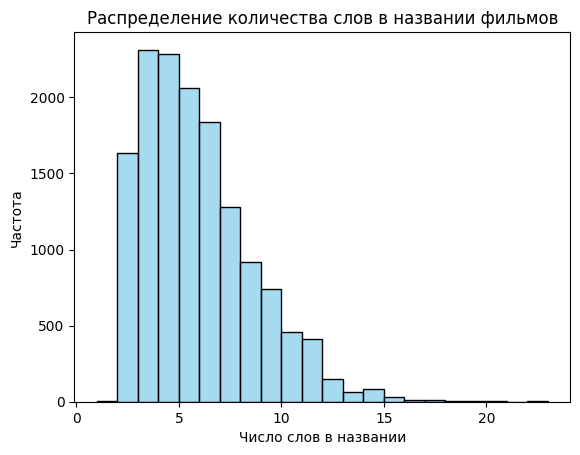

In [83]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(df['wordsInTitle'], kde=False, bins=range(1, df['wordsInTitle'].max() + 2), color='skyblue')

plt.title("Распределение количества слов в названии фильмов")
plt.xlabel("Число слов в названии")
plt.ylabel("Частота")

mode_words = df['wordsInTitle'].mode()[0] 
print(f"Самое частое количество слов в названии (мода): {mode_words}")

print(f"Медиана количества слов в названии: {median_words}")

plt.show()


__Вопрос 5:__ Посмотрим на то, как менялась со временем продолжительность фильмов? Постройте график и ответьте на вопрос, в каком десятилетии доля коротких фильмов (короче часа) была выше всего? Рассматриваем период >= 1920 года.

Ответ - десятилетие, например, если больше всего коротких фильмов было в период 1950 - 1959, то 1950.

decade
1920.0     16
1930.0     33
1940.0     30
1950.0     48
1960.0    119
1970.0    101
1980.0    194
1990.0    428
2000.0    940
2010.0    739
dtype: int64
decade
1920.0    0.101266
1930.0    0.095101
1940.0    0.061983
1950.0    0.071749
1960.0    0.145122
1970.0    0.104663
1980.0    0.140886
1990.0    0.181202
2000.0    0.203199
2010.0    0.304240
dtype: float64


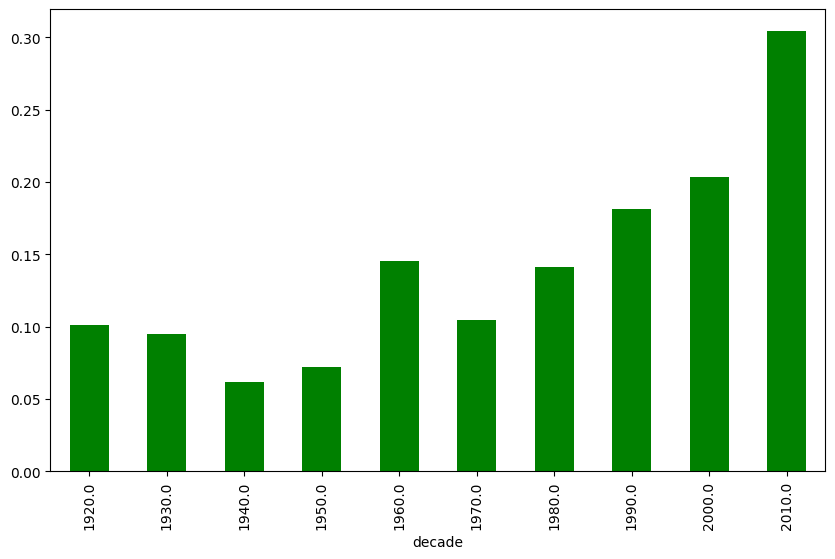

2000.0


In [89]:
import pandas as pd
import matplotlib.pyplot as plt

df_copy = df.copy()
df_copy = df_copy[df_copy['year'] >= 1920]
total_counts = df_copy.groupby('decade').size()
short_film_counts = df_copy[df_copy['duration'] < 3600].groupby('decade').size()
print(short_film_counts)
shortest_ratio = short_film_counts / total_counts
print(shortest_ratio)
plt.figure(figsize = (10,6))
shortest_ratio.plot(kind = 'bar', color = 'green')
plt.show()
best_dec = short_film_counts.idxmax()
print(best_dec)

__Вопрос 6:__ И последний вопрос: фильмам какого жанра пользователи оставляют больше всего рецензий? Подумайте о  том, по какой метрике лучше всего смотреть. В ответе укажите жанр.

In [ ]:

df_filtered = df.drop(columns=['fn', 'tid', 'decade', 'title', 'wordsInTitle', 'url', 'imdbRating', 'duration', 'year', 'type',
                               'nrOfWins', 'nrOfNominations', 'nrOfPhotos', 'nrOfNewsArticles', 'nrOfUserReviews', 'nrOfGenre'])
genre_cols = df_filtered.drop(columns=['ratingCount'])

genre_rev = genre_cols.multiply(df_filtered['ratingCount'], axis=0)
genre_counts = genre_cols.sum()
genre_avg_reviews = genre_rev.sum() / genre_counts

max_avg_review_genre = genre_avg_reviews.idxmax()
print(f"Жанр с наибольшим средним количеством рецензий на фильм: {max_avg_review_genre}")



Жанр с наибольшим средним количеством рецензий на фильм: Thriller
